# Logistic regression

In this exercise you will train a logistic regression model via gradient descent in two simple scenarios.
 
The general setup is as follows:
* we are given a set of pairs $(x, y)$, where $x \in R^D$ is a vector of real numbers representing the features, and $y \in \{0,1\}$ is the target,
* for a given $x$ we model the probability of $y=1$ by $h(x):=g(w^Tx)$, where $g$ is the sigmoid function: $g(z) = \frac{1}{1+e^{-z}}$,
* to find the right $w$ we will optimize the so called logarithmic loss: $J(w) = -\frac{1}{n}\sum_{i=1}^n y_i \log{h(x_i)} + (1-y_i) \log{(1-h(x_i))}$,
* with the loss function in hand we can improve our guesses iteratively:
    * $w_j^{t+1} = w_j^t - \text{step_size} \cdot \frac{\partial J(w)}{\partial w_j}$,
* we can end the process after some predefined number of epochs (or when the changes are no longer meaningful).

Let's start with the simplest example - linear separated points on a plane. 

In [11]:
%matplotlib inline

import numpy as np
import math
import sys

np.random.seed(123)

# these parametrize the line
a = 0.3
b = -0.2
c = 0.001

# True/False mapping
def lin_rule(x, noise=0.):
    return a * x[0] + b * x[1] + c + noise < 0.

# Just for plotting
def get_y_fun(a, b, c):
    def y(x):
        return - x * a / b - c / b
    return y

lin_fun = get_y_fun(a, b, c)

In [3]:
# Training data

n = 500
range_points = 1
sigma = 0.05

X = range_points * 2 * (np.random.rand(n, 2) - 0.5)
y = [lin_rule(x, sigma * np.random.normal()) for x in X]

print X[:10]
print y[:10]

[[ 0.39293837 -0.42772133]
 [-0.54629709  0.10262954]
 [ 0.43893794 -0.15378708]
 [ 0.9615284   0.36965948]
 [-0.0381362  -0.21576496]
 [-0.31364397  0.45809941]
 [-0.12285551 -0.88064421]
 [-0.20391149  0.47599081]
 [-0.63501654 -0.64909649]
 [ 0.06310275  0.06365517]]
[False, True, False, False, False, True, False, True, True, False]


Let's plot the data.

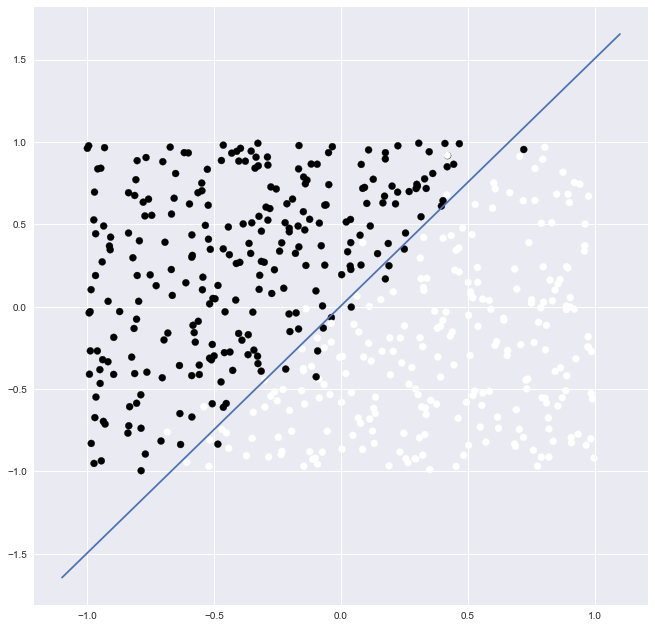

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

range_plot = 1.1
h = .002

plt.figure(figsize=(11,11))

plt.scatter(X[:, 0], X[: , 1], c=y)

_x = np.linspace(-range_plot, range_plot, 1000)
_y = lin_fun(_x)

plt.plot(_x, _y)

Now, let's implement and train a logistic regression model.

In [5]:
a = np.array([[1, 2], [3, 4]])
b = np.array([5, 6])
# print a.shape
for v in a:
    print b.dot(v); print len(v)
#     print v; print v.shape

17
2
39
2


In [6]:
"""Init param values"""
w = np.array([0, 0, 0])

"""Add a column with 1s to data"""
X2 = np.append(X, np.ones((len(X), 1)), axis=1)

"""Logistic function"""
g = lambda z: 1 / (1 + np.exp(-z))

"""Takes (w and) x and returns the prob"""
h = lambda x: g(w.dot(x))

"""Partial derivative of the loss function I(w) wrt. w_i"""
partial_derivative = lambda i: sum((h(x) - y) * x[i] for (x, y) in zip(X2, y))
# partial_derivative = lambda i: sum((h(x) - y) * (x[i] if i < x.size else 1) for (x, y) in zip(X, y))

"""Gradient vector of the loss function"""
gradient = lambda w: np.array([partial_derivative(i) for i in xrange(w.size)])

"""Loss function"""
loss_function = lambda w: (-1) * sum(yi * math.log(h(x) + sys.float_info.min) + (1 - yi) * math.log(1 - h(x) + sys.float_info.min) for (x, yi) in zip(X2, y))

"""Gradient descent params"""
iters = 50
alfa = 0.1

# gradient descent
logging = []
for _ in xrange(iters):
    loss = loss_function(w)
    logging.append(loss)
    w = w - (alfa * gradient(w))

Let's visually asses our model. We can do this by using our estimates for $a,b,c$.

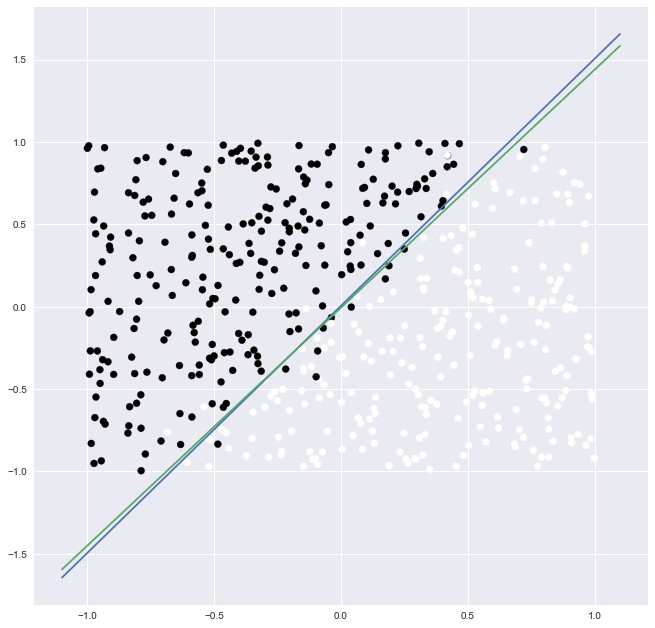

In [7]:
plt.figure(figsize=(11,11))

#################################################################
# TODO: Pass your estimates for a,b,c to the get_y_fun function #
#################################################################

lin_fun2 = get_y_fun(w[0], w[1], w[2])

_y2 = lin_fun2(_x)

plt.figure(figsize=(11,11))
plt.scatter(X[:, 0], X[: , 1], c=y)
plt.plot(_x, _y, _x, _y2)

Let's now complicate the things a little bit and make our next problem nonlinear.

In [8]:
# Parameters of the ellipse
s1 = 1.
s2 = 2.
r = 0.75
m1 = 0.15
m2 = 0.125

# True/False mapping, checks whether we are inside the ellipse
def circle_rule(x, noise=0.):
    return s1 * (x[0] - m1) ** 2 + s2 * (x[1] - m2) ** 2 + noise < r ** 2.

In [9]:
# Training data

n = 500
range_points = 1

sigma = 0.1

X = range_points * 2 * (np.random.rand(n, 2) - 0.5)

y = [circle_rule(x, sigma * np.random.normal()) for x in X]

print X[:10]
print y[:10]

[[ 0.18633789  0.87560968]
 [-0.81999293  0.61838609]
 [ 0.22604784  0.28001611]
 [ 0.9846182  -0.35783437]
 [-0.27962406  0.07170775]
 [ 0.2501677  -0.37650776]
 [ 0.41264707 -0.8357508 ]
 [-0.61039043 -0.97349628]
 [ 0.49924022  0.89579621]
 [ 0.537422   -0.65425777]]
[False, False, True, False, True, True, False, False, False, False]


Let's plot the data.

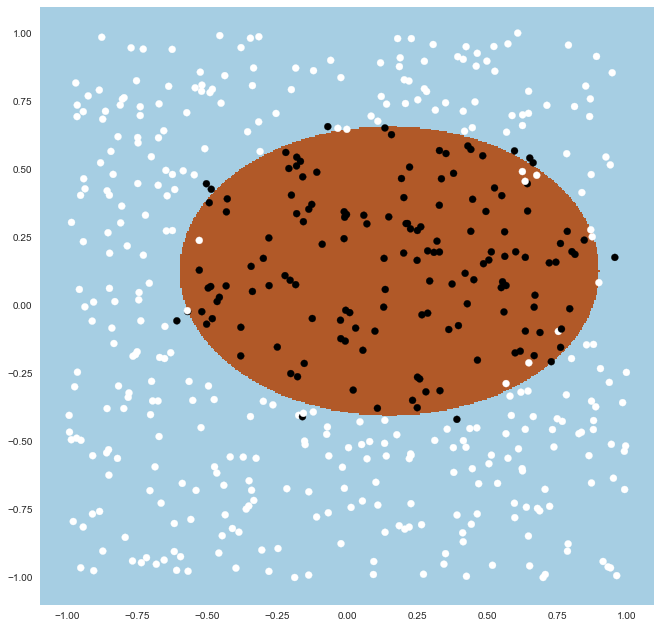

In [10]:
range_plot = 1.1
h = .005

plt.figure(figsize=(11,11))

xx, yy = np.meshgrid(np.arange(-range_plot, range_plot, h), np.arange(-range_plot, range_plot, h))
Z = np.array(map(circle_rule, np.c_[xx.ravel(), yy.ravel()]))

Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

plt.scatter(X[:, 0], X[: , 1], c=y)

Now, let's train a logistic regression model to tackle this problem. Note that we now need a nonlinear decision boundary. 

Hint: 
<sub><sup><sub><sup><sub><sup>
Use feature engineering.
</sup></sub></sup></sub></sup></sub>

In [ ]:
# let's make this one into a procedure
# take the data set and return the h function

# """Init param values"""
# w = np.array([0, 0, 0])

# """Add a column with 1s to data"""
# X2 = np.append(X, np.ones((len(X), 1)), axis=1)
#
# """Logistic function"""
# g = lambda z: 1 / (1 + np.exp(-z))

# """Takes (w and) x and returns the prob"""
# h = lambda x: g(w.dot(x))
#
# """Partial derivative of the loss function I(w) wrt. w_i"""
# partial_derivative = lambda i: sum((h(x) - y) * x[i] for (x, y) in zip(X2, y))
# # partial_derivative = lambda i: sum((h(x) - y) * (x[i] if i < x.size else 1) for (x, y) in zip(X, y))
#
# """Gradient vector of the loss function"""
# gradient = lambda w: np.array([partial_derivative(i) for i in xrange(w.size)])

"""Loss function"""
loss_function = lambda w: (-1) * sum(
    yi * math.log(h(x) + sys.float_info.min) + (1 - yi) * math.log(1 - h(x) + sys.float_info.min) for (x, yi) in
    zip(X2, y))


def logistic_function(z):
    """Logistic function"""
    return 1 / (1 + np.exp(-z))


def classification_function_factory(w):
    def h(x):
        return logistic_function(w.dot(x))
    return h


def partial_derivative(h, xs, ys, i):
    return sum((h(x) - y) * x[i] for (x, y) in zip(xs, ys))


def gradient(h, xs, ys):
    return np.array(partial_derivative(h, xs, ys, i) for i in xrange(xs[0].size))


def learn(xs, ys, iters=50, learning_rate=0.1):
    """Gradient descent"""

    # Init param values
    w = np.array(0 for _ in xrange(len(xs)))

    # Add a column with 1s to data
    X2 = np.append(X, np.ones((len(X), 1)), axis=1)

# gradient descent
logging = []
for _ in xrange(iters):
    loss = loss_function(w)
    logging.append(loss)
    w = w - (learning_rate * gradient(w))

Let's visually asses our model. 

Contrary to the previous scenario, converting our weights to parameters of the ground truth curve may not be straightforward. It's easier to just provide predictions for a set of points in $R^2$.

In [ ]:
range_plot = 1.1
h = .005

xx, yy = np.meshgrid(np.arange(-range_plot, range_plot, h), np.arange(-range_plot, range_plot, h))
X_plot = np.c_[xx.ravel(), yy.ravel()]

print X_plot
print X_plot.shape

############################################################
# TODO: Compute true/false predictions for the X_plot data #
############################################################

preds = ...

In [ ]:
plt.figure(figsize=(11,11))

Z = preds
Z = np.array(Z).reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

Z = np.array(map(circle_rule, X_plot))
Z = Z.reshape(xx.shape)

plt.pcolormesh(xx, yy, Z, alpha=0.1, cmap=plt.cm.Paired)

plt.scatter(X[:, 0], X[: , 1], c=y)